# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
import warnings #For removing warning messages which is not important
warnings.filterwarnings('ignore')

# Load and Clean Dataset
Content analysis of the transcribed exibitions of Singapore's Centre for Ethnobotany was done on Microsoft Word, using a macros freely available at www.thedoctools.com that exports comments to an excel file.

Content analysis is a quantitative research method, that allows to analyze text data in a more quantitative way. It uses frequency of certain words to identify patterns, themes and concepts. In this study it was used to identify the most influential plants based on the perspective set by The National Parks Board, which is a statutory board under the Ministry of National Development of the Government of Singapore



In [39]:
df = pd.read_excel('content_analysis.xlsx')
df.sample(3)

,Page,Comment scope,Comment text,Author,Date,CorrPlant
278,21,botanic gardens across the world play an impor...,Conservation: Environment,"Vera Rodriguez, Yrina",2024-03-25 00:00:00,NaN
504,36,gregarious D. aromatica,Dryobalanops PT,"Vera Rodriguez, Yrina E",2024-03-26 00:00:00,NaN
1053,4,Dayak,Tribe name,"Vera Rodriguez, Yrina E",2024-03-16 00:00:00,NaN


In [40]:
#Rename and reorder columns
df.rename(columns={'Comment text':'Code'},inplace=True)
df.rename(columns= {'Comment scope':'Text'}, inplace=True)
df.drop(['Author','Date'], axis=1, inplace=True)
df=df.reindex(columns=['Code','Text','CorrPlant','Page'])
df['Page']=df['Page'].astype(int)


print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       1120 non-null   object
 1   Text       1120 non-null   object
 2   CorrPlant  340 non-null    object
 3   Page       1120 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 35.1+ KB
None


,Code,Text,CorrPlant,Page
297,Conservation: Indigenous Culture,There are increasing movements to protect indi...,NaN,22
225,Commercial: Food,Cinchona plantations are still found in the Ni...,Cinnamon,34
461,Craft,The timber may be used,Other Artocarpus trees,46
851,Rubber Tree PT,RUBBER (Hevea brasiliensis),NaN,24
462,Craft,The orange-red wood is used for furniture,Other Artocarpus trees,47


# Unique Plants
Looking at PlantCodeWords in the text, to find unique species mentioned and their frequency.

New table columns:
- Code: Is the code word for each plant (in the original dataset, they all contain ' PT' at the end)
- Text: Text over which the comment was made in Word
- CorrPlant: NA
- Page: Page where the comment was in the original transcribed text

In [41]:
df_plant = df[df['Code'].str.endswith(' PT')]
df_plant.loc[:, 'Code']=df_plant['Code'].apply(lambda x: x[:-3])
df_plant.info()
df_plant.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 0 to 1119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       552 non-null    object
 1   Text       552 non-null    object
 2   CorrPlant  0 non-null      object
 3   Page       552 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.6+ KB


,Code,Text,CorrPlant,Page
35,Alnus Tree,Alnus trees,NaN,22
192,Cinnamon,cinchona,NaN,34
826,Rice,Rice,NaN,24
31,Akar Ipoh,Strychnos ignati,NaN,33
856,Rubber Tree,Rubber,NaN,25


In [29]:
len(df_plant['Code'].unique())

116

## PlantCodeWord distribution along the transcribed text

<Axes: xlabel='Page', ylabel='Count'>

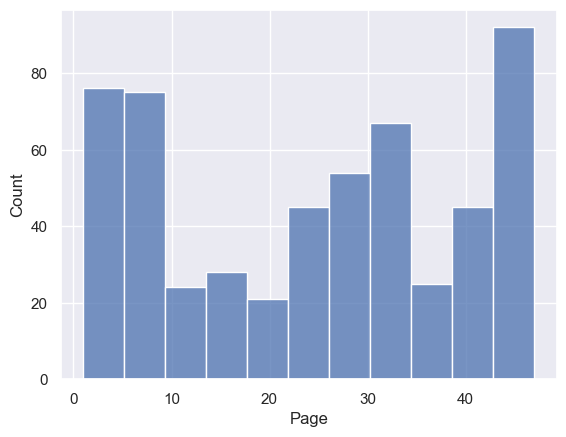

In [30]:
sb.histplot(df_plant['Page'])

## All unique plants

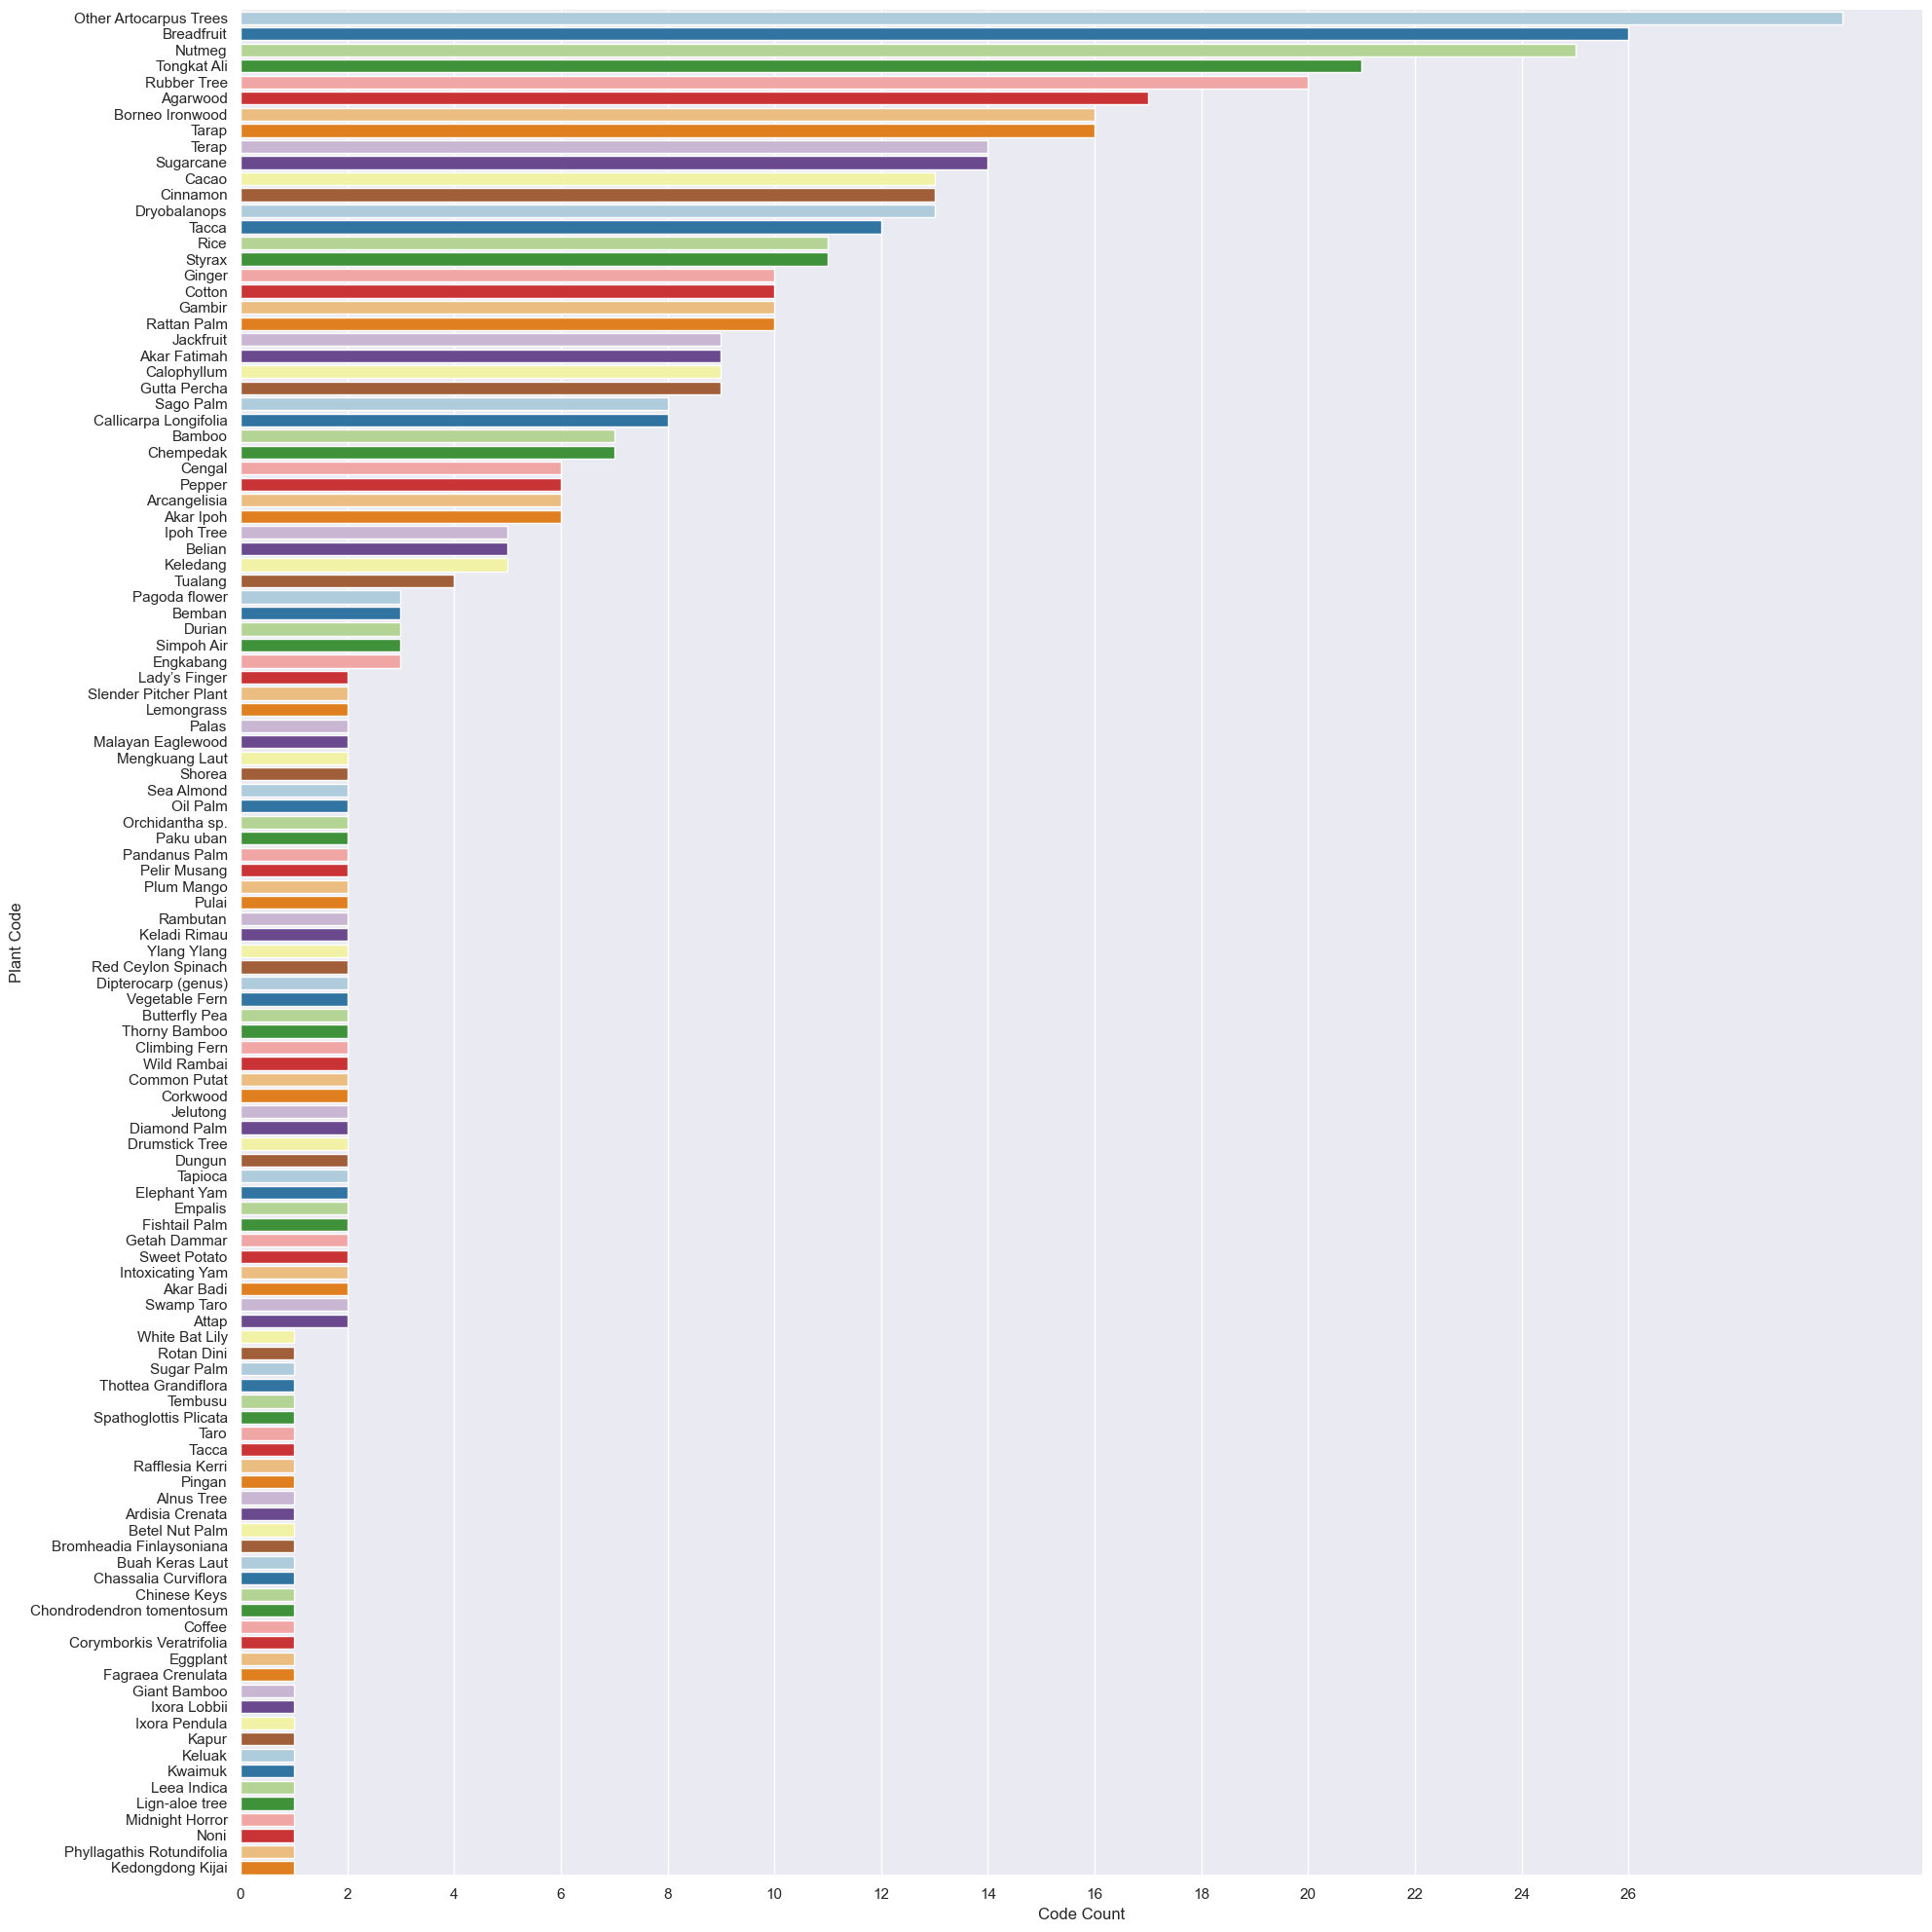

In [42]:
sb.catplot(data= df_plant, y= "Code", kind = 'count', order = df_plant["Code"].value_counts().index, height=20, palette='Paired')
plt.xticks(np.arange(0,28,2))
plt.ylabel('Plant Code')
plt.xlabel('Code Count')
plt.savefig('catplot_totalplant_count_3x3.png', dpi=300, bbox_inches='tight')

# Plant uses
New table columns:
- Code: Is the code word for the use (crafting, medicinal,...) a certain plant was given
- Text: Text over which the comment was made in Word
- CorrPlant: The plant the use was about
- Page: Page where the comment was in the original transcribed text

In [33]:
index_colmn=['Food','Medicinal','Craft','Hunting','Symbolism','Ornamental','Cosmetic','Commercial','Commercial: Food','Commercial: Craft','Commercial: Medicinal','Commercial: Ornamental','Other']
df_uses_pre = df[df['Code'].isin(index_colmn)]

df_uses_pre['Code']=df_uses_pre['Code'].replace(['Commercial','Commercial: Food','Commercial: Craft','Commercial: Medicinal','Commercial: Ornamental'], 'Commercial')
df_uses=df_uses_pre

In [34]:
df_uses_plant=df_uses[df_uses['CorrPlant'].isna()==False]
df_uses_plant.sample(5)


,Code,Text,CorrPlant,Page
453,Craft,the orange-coloured wood of chempedak (Artocar...,Chempedak,45
761,Ornamental,sculptures by Ms Aileen Toh are made out of Sh...,Tembusu,1
589,Other,"Here, sculptures inspired by the distinctively...",Engkabang,15
353,Food,"The chempedak is also dipped in batter, fried ...",Chempedak,45
318,Food,Sweet Potatoes and Tapioca are grown for their...,Tapioca,8


In [35]:
len(df_uses_plant['CorrPlant'].unique())

99

## Plant Use Distribution

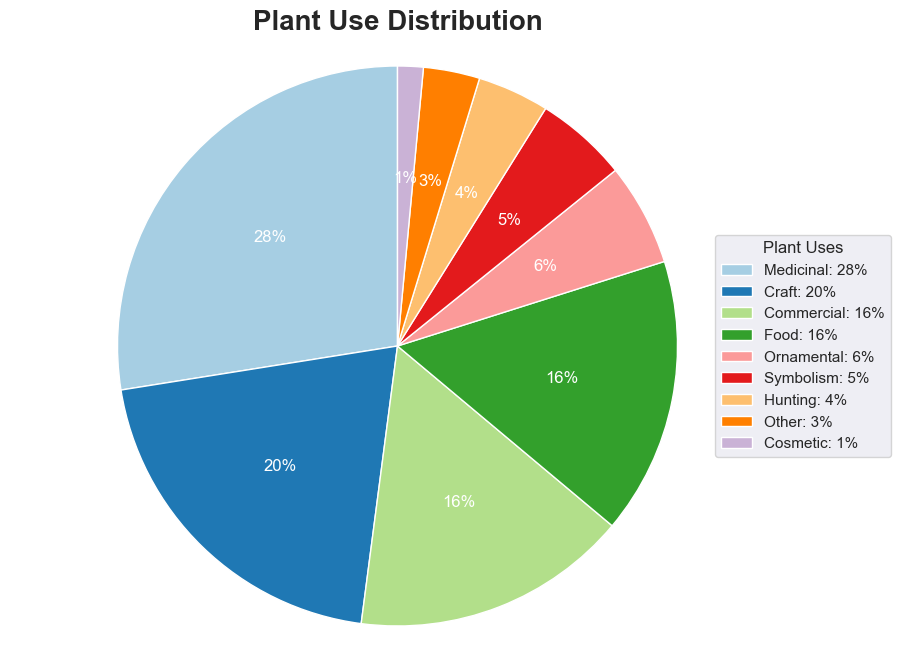

In [20]:
# Colors
pal = sb.color_palette('Paired')
colors = pal.as_hex()

# Plot
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(x=use_count['Code Count'], labels=use_count['Plant Uses'], autopct='%1.0f%%', startangle=90,textprops=dict(color="w"),colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Plant Use Distribution', fontsize=20, fontweight='bold')


legend_labels = []
count=0
for label in use_count['Plant Uses']:
    legend_labels+=[label+': '+str(int(round(((use_count['Code Count']/338)*100)[count],0)))+'%']
    count+=1

plt.legend(
    wedges,
    legend_labels,
    title="Plant Uses",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1)
)
plt.savefig('PlantUseDistribution', dpi=300,bbox_inches='tight')


## Unique plants and their respective uses

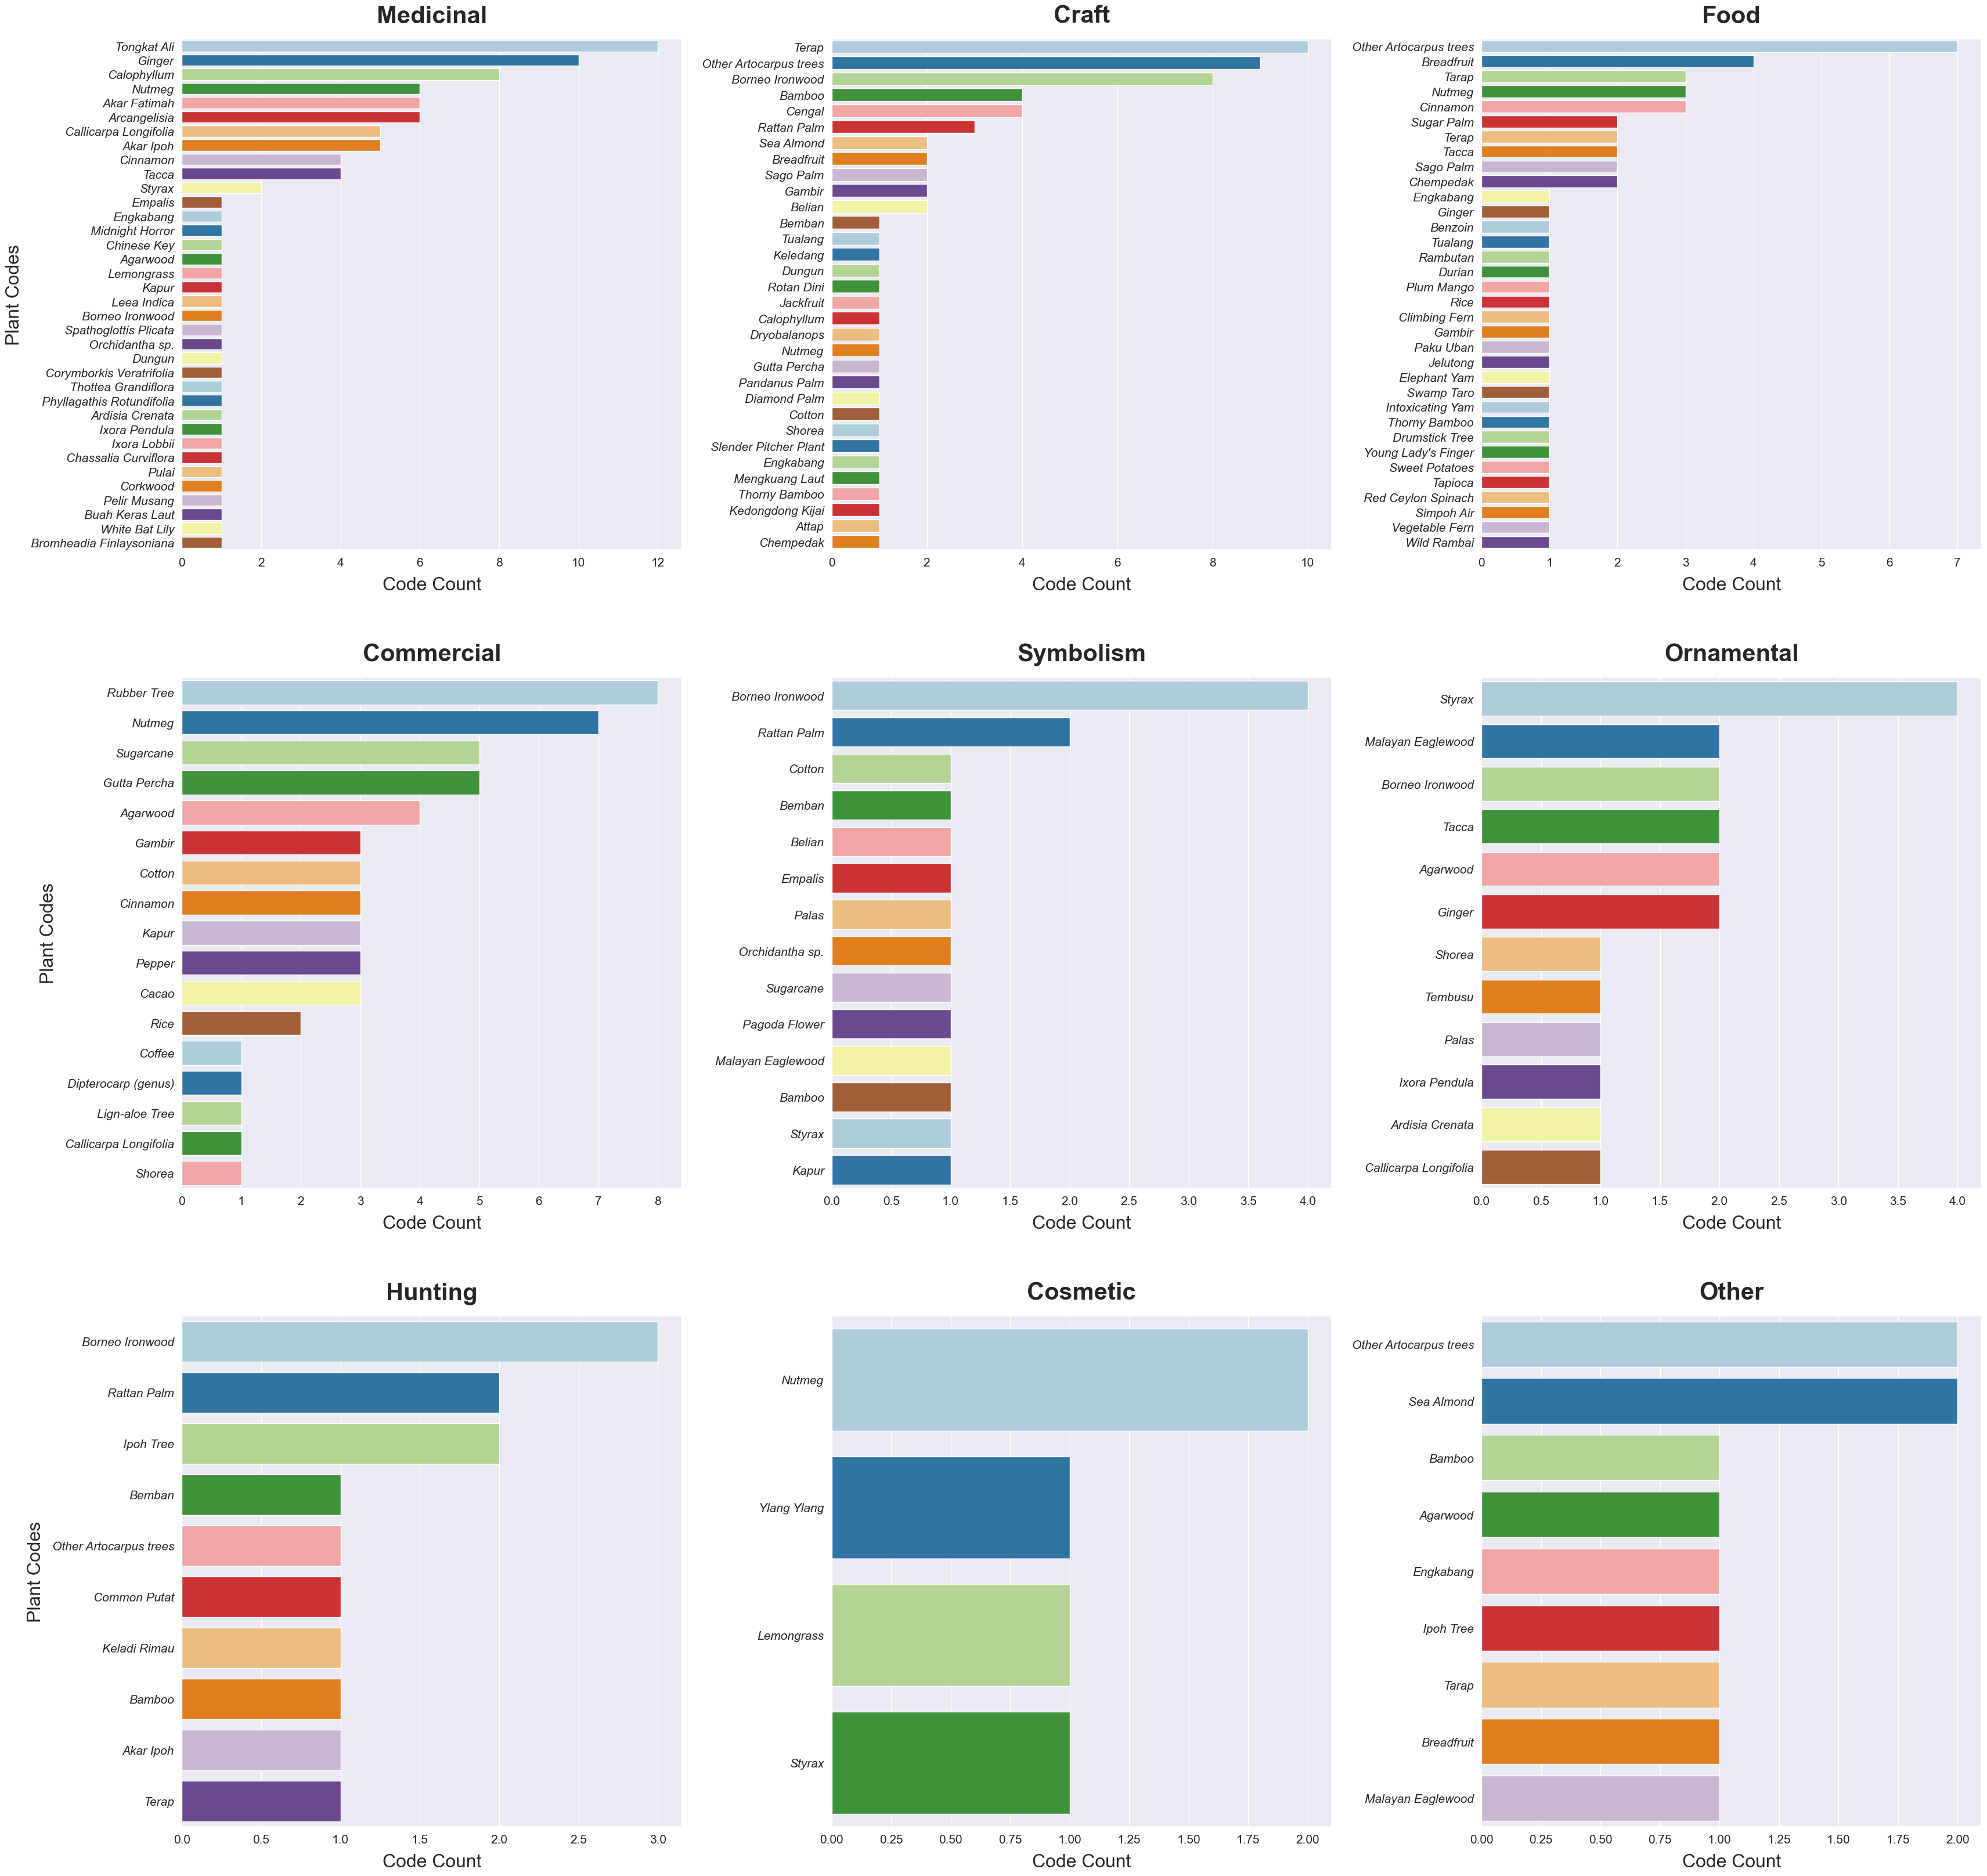

In [38]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 40))  # Adjusted to 3x3 grid
index_colmn = ['Medicinal', 'Craft', 'Food', 'Commercial', 'Symbolism', 'Ornamental', 'Hunting', 'Cosmetic', 'Other']

count = 0
for each_use in index_colmn:
    each_df = df_uses_plant[df_uses_plant['Code'] == each_use]       
    if count % 3 == 0:  # Adjusted to 3 columns
        sb.countplot(data=each_df, y="CorrPlant", order=each_df["CorrPlant"].value_counts().index, ax=axes[int(count/3), 0], palette='Paired')  # Adjusted indexing
        axes[int(count/3), 0].set_title(each_use, fontsize=30, fontweight='bold', pad=20)  # Adjusted indexing
        axes[int(count/3), 0].set_ylabel('Plant Codes', fontsize=23,labelpad=10)  # Set y-axis label
        axes[int(count/3), 0].set_xlabel('Code Count', fontsize=23, labelpad=10)  # Set x-axis label
        axes[int(count/3), 0].tick_params(axis='both', labelsize=15)  # Set tick label font size
        for tick in axes[int(count/3), 0].get_yticklabels():
            tick.set_fontstyle('italic')  # Set y-axis tick labels to italic
    else:
        col = count % 3  # Adjusted to 3 columns
        sb.countplot(data=each_df, y="CorrPlant", order=each_df["CorrPlant"].value_counts().index, ax=axes[int(count/3), col], palette='Paired')  # Adjusted indexing
        axes[int(count/3), col].set_title(each_use, fontsize=30, fontweight='bold', pad=20)  # Adjusted indexing
        axes[int(count/3), col].set_ylabel('')  # Remove y-axis label
        axes[int(count/3), col].set_xlabel('Code Count', fontsize=23, labelpad=10)  # Set x-axis label
        axes[int(count/3), col].tick_params(axis='both', labelsize=15)  # Set tick label font size
        for tick in axes[int(count/3), col].get_yticklabels():
            tick.set_fontstyle('italic')  # Set y-axis tick labels to italic   
    count += 1

# Adjust layout
plt.subplots_adjust(hspace=0.25, wspace=0.3)  # Adjust the spacing between subplots

# Save the plot with high quality
plt.savefig('catplot_plantuses_count_3x3.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()